In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [ ]:
file_path = 'dataSynthetic.csv'  # Update the path to your CSV file
data = pd.read_csv(file_path)

In [ ]:
X = data.drop(columns=['Timestamp', 'Pod Name', 'Pod Status'])  # Drop non-numeric columns
y = data['Pod Status']

In [ ]:
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

In [ ]:
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column].astype(str))

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Pod Reason']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_encoded, test_size=0.2, random_state=42)

In [ ]:
model = xgb.XGBClassifier(
    eval_metric='mlogloss',
    use_label_encoder=False,
    tree_method='hist',  # Updated to use 'hist' method
    device='cuda',  # Use GPU (CUDA)
)

In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [ ]:
model.fit(X_train, y_train,
          eval_set=eval_set,
          verbose=True,  # Print progress for each iteration
          )

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:46:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:1.05212	validation_1-mlogloss:1.05704
[1]	validation_0-mlogloss:0.72651	validation_1-mlogloss:0.73503
[2]	validation_0-mlogloss:0.52489	validation_1-mlogloss:0.53626
[3]	validation_0-mlogloss:0.38883	validation_1-mlogloss:0.40310
[4]	validation_0-mlogloss:0.29282	validation_1-mlogloss:0.30984
[5]	validation_0-mlogloss:0.22348	validation_1-mlogloss:0.24356
[6]	validation_0-mlogloss:0.17295	validation_1-mlogloss:0.19568
[7]	validation_0-mlogloss:0.13529	validation_1-mlogloss:0.16041
[8]	validation_0-mlogloss:0.10713	validation_1-mlogloss:0.13484
[9]	validation_0-mlogloss:0.08603	validation_1-mlogloss:0.11636
[10]	validation_0-mlogloss:0.07005	validation_1-mlogloss:0.10264
[11]	validation_0-mlogloss:0.05767	validation_1-mlogloss:0.09274
[12]	validation_0-mlogloss:0.04825	validation_1-mlogloss:0.08542
[13]	validation_0-mlogloss:0.04088	validation_1-mlogloss:0.08000
[14]	validation_0-mlogloss:0.03485	validation_1-mlogloss:0.07613
[15]	validation_0-mlogloss:0.03007	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
evals_result = model.evals_result()
print(evals_result)

{'validation_0': OrderedDict([('mlogloss', [1.0521211508727109, 0.7265069021806789, 0.5248850335911351, 0.3888290466523621, 0.2928186471786129, 0.2234845261881215, 0.1729506844494763, 0.13528873222499618, 0.10712872064379671, 0.08602677273608435, 0.07004513178028646, 0.05766949358692455, 0.04824904110293473, 0.04087829856426802, 0.03485442736473059, 0.03007424670136229, 0.02601248867932203, 0.02294913641256595, 0.02029537599058493, 0.01792973042157268, 0.01615036655496031, 0.01475106426312988, 0.01342678525110118, 0.01232652928735029, 0.01137266894376153, 0.01041143380467004, 0.00963670977684785, 0.00896109059296451, 0.00839761787912139, 0.00789352603335391, 0.00732767742678146, 0.00676659762880562, 0.00635630690288398, 0.00595356418260684, 0.00553238081089203, 0.00517951581125382, 0.0049664490147293, 0.00473332147333726, 0.00444896506621529, 0.00418039015918229, 0.00395717407921692, 0.00377716993710983, 0.00360225269075296, 0.00342300452546125, 0.00326894152448315, 0.00312777073497916

In [ ]:
train_loss = evals_result['validation_0']['mlogloss']
val_loss = evals_result['validation_1']['mlogloss']

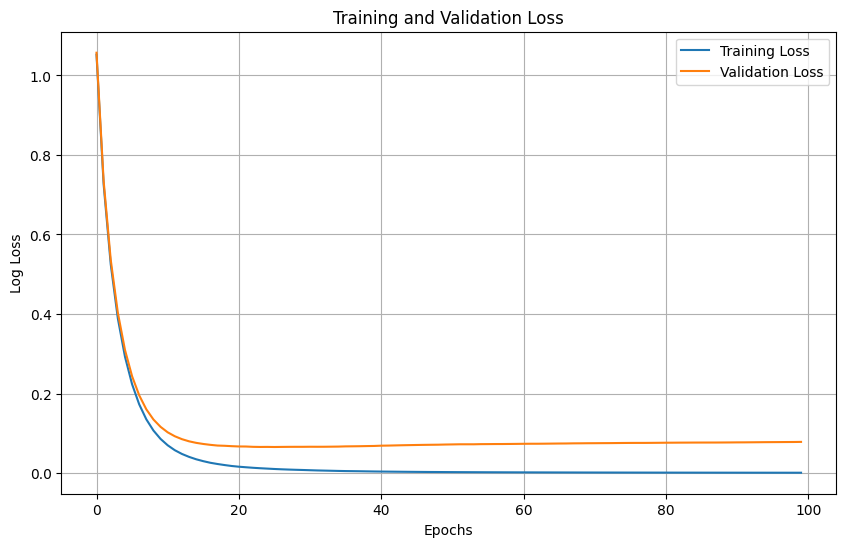

In [ ]:
epochs = len(train_loss)  # Number of epochs
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Test Accuracy: 0.9819401444788441


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:48:14] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.9819401444788441
